In [4]:
import numpy as np
import pandas as pd


full_test = pd.read_csv("test.csv", index_col='id')
full_train = pd.read_csv("train.csv", index_col='id')
test_sz = full_test.sat_id.nunique()

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [5]:
train_coefs = pd.DataFrame({'sat_id': full_test.sat_id.unique(), 'A': np.zeros(test_sz),
                            'B': np.zeros(test_sz), 'C': np.zeros(test_sz), 'D': np.zeros(test_sz)})

In [3]:
from random import shuffle

In [4]:
np.random.seed(31415)

In [8]:
from sklearn.linear_model import LinearRegression


for sat_id in train_coefs.sat_id:
    # print(sat_id)
    df = full_train[full_train.sat_id == sat_id]
    n = 0; i = 0
    
    a = np.zeros(df.shape[0] // 3); b = np.zeros(df.shape[0] // 3)
    c = np.zeros(df.shape[0] // 3); d = np.zeros(df.shape[0] // 3)

    p1 = df[['x', 'y', 'z']].sample(frac=1).values
    p2 = df[['x', 'y', 'z']].sample(frac=1).values
    p3 = df[['x', 'y', 'z']].sample(frac=1).values
       
    v1 = p3 - p1
    v2 = p2 - p1
 
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    sgn_ = 2 * (cp[:, 0] >= 0) - 1
    cp *= sgn_.reshape(-1, 1)
    a, b, c = cp[:, 0], cp[:, 1], cp[:, 2]
   
    norm = np.sqrt(a ** 2 + b ** 2 + c ** 2)
 
    a /= norm
    b /= norm
    c /= norm
    
    d = -(a * p1[:, 0] + b * p1[:, 1] + c * p1[:, 2])
 
    train_coefs.loc[train_coefs.sat_id == sat_id, 'A'] = np.nanmedian(a)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'B'] = np.nanmedian(b)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'C'] = np.nanmedian(c)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'D'] = np.nanmedian(d)

1
2
3
4
6
9
16
20
22
24


C:\Users\Polina\Anaconda2\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in divide
C:\Users\Polina\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide
C:\Users\Polina\Anaconda2\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in divide


25
26
27
28
29
32
34
35
36
37
38
39
40
41
42
44
45
49
51
52
53
54
57
59
63
64
68
70
75
82
84
86
89
90
91
92
93
96
98
100
101
102
105
106
109
110
112
113
114
117
118
120
121
123
124
125
126
127
128
130
132
133
135
138
142
143
144
145
149
151
152
153
155
156
158
159
160
162
164
165
166
169
170
172
173
177
178
183
186
187
188
191
193
194
195
197
203
205
206
207
208
209
210
211
213
219
220
222
223
225
227
228
229
230
233
236
239
240
241
242
243
244
245
247
248
251
252
253
254
261
263
264
265
268
270
275
277
278
281
284
288
292
293
294
298
299
301
304
306
309
310
312
314
316
319
324
326
332
333
342
343
344
347
348
349
356
357
358
359
362
363
372
373
375
377
380
382
384
385
387
389
390
391
392
393
395
396
399
400
407
409
411
412
415
416
417
418
419
422
423
424
426
428
435
436
437
438
440
443
446
448
449
450
452
454
455
456
457
460
462
464
465
466
467
468
470
471
473
474
475
476
477
479
480
481
482
483
486
488
489
491
495
498
499
502
504
505
506
508
509
510
511
514
515
516
517
519
522
523
524

In [9]:
train_coefs.head()

A         B         C           D  sat_id
0  0.105813 -0.506322 -0.830986  428.095768       1
1  0.272114  0.582492  0.765522    0.417844       2
2  0.043096  0.024531 -0.998760  -11.926576       3
3  0.153223 -0.843987  0.513590   10.014767       4
4  0.274336  0.515361 -0.811837   -5.018759       6

In [10]:
train_coefs.to_csv("ABCD.csv", index=False)

In [11]:
abs(train_coefs.C).min()

0.007037690900878411

<IPython.core.display.Javascript object>


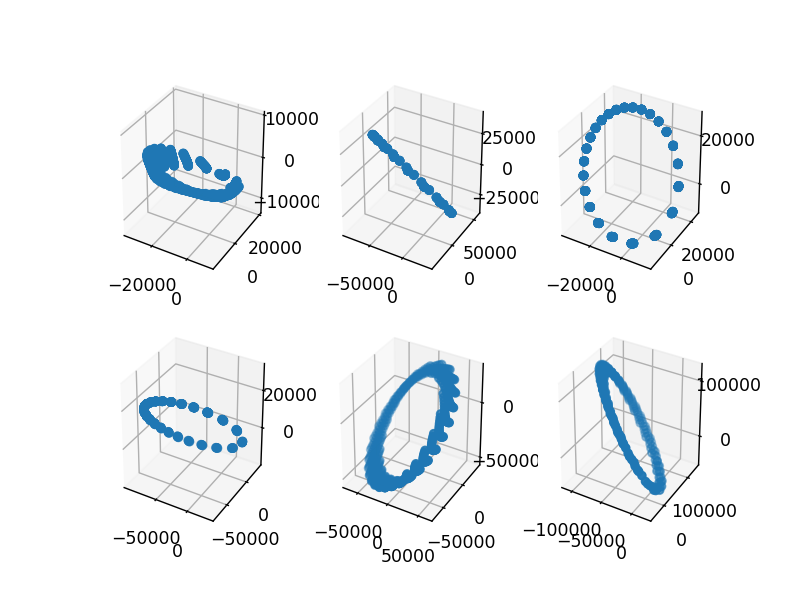

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(231, projection='3d')
ax.scatter(full_train[full_train.sat_id == 1].x, full_train[full_train.sat_id == 1].y, full_train[full_train.sat_id == 1].z)

ax = fig.add_subplot(232, projection='3d')
ax.scatter(full_train[full_train.sat_id == 2].x, full_train[full_train.sat_id == 2].y, full_train[full_train.sat_id == 2].z)

ax = fig.add_subplot(233, projection='3d')
ax.scatter(full_train[full_train.sat_id == 579].x, full_train[full_train.sat_id == 579].y, full_train[full_train.sat_id == 579].z)

ax = fig.add_subplot(234, projection='3d')
ax.scatter(full_train[full_train.sat_id == 596].x, full_train[full_train.sat_id == 596].y, full_train[full_train.sat_id == 596].z)

ax = fig.add_subplot(235, projection='3d')
ax.scatter(full_train[full_train.sat_id == 6].x, full_train[full_train.sat_id == 6].y, full_train[full_train.sat_id == 6].z)

ax = fig.add_subplot(236, projection='3d')
ax.scatter(full_train[full_train.sat_id == 20].x, full_train[full_train.sat_id == 20].y, full_train[full_train.sat_id == 20].z)


In [7]:
train_coefs = pd.read_csv('ABCD.csv')
train_coefs.head()

A         B         C           D  sat_id
0  0.105813 -0.506322 -0.830986  428.095768       1
1  0.272114  0.582492  0.765522    0.417844       2
2  0.043096  0.024531 -0.998760  -11.926576       3
3  0.153223 -0.843987  0.513590   10.014767       4
4  0.274336  0.515361 -0.811837   -5.018759       6

In [8]:
A = train_coefs[train_coefs.sat_id == 1]['A'][0]
A

0.1058128009454192

<IPython.core.display.Javascript object>


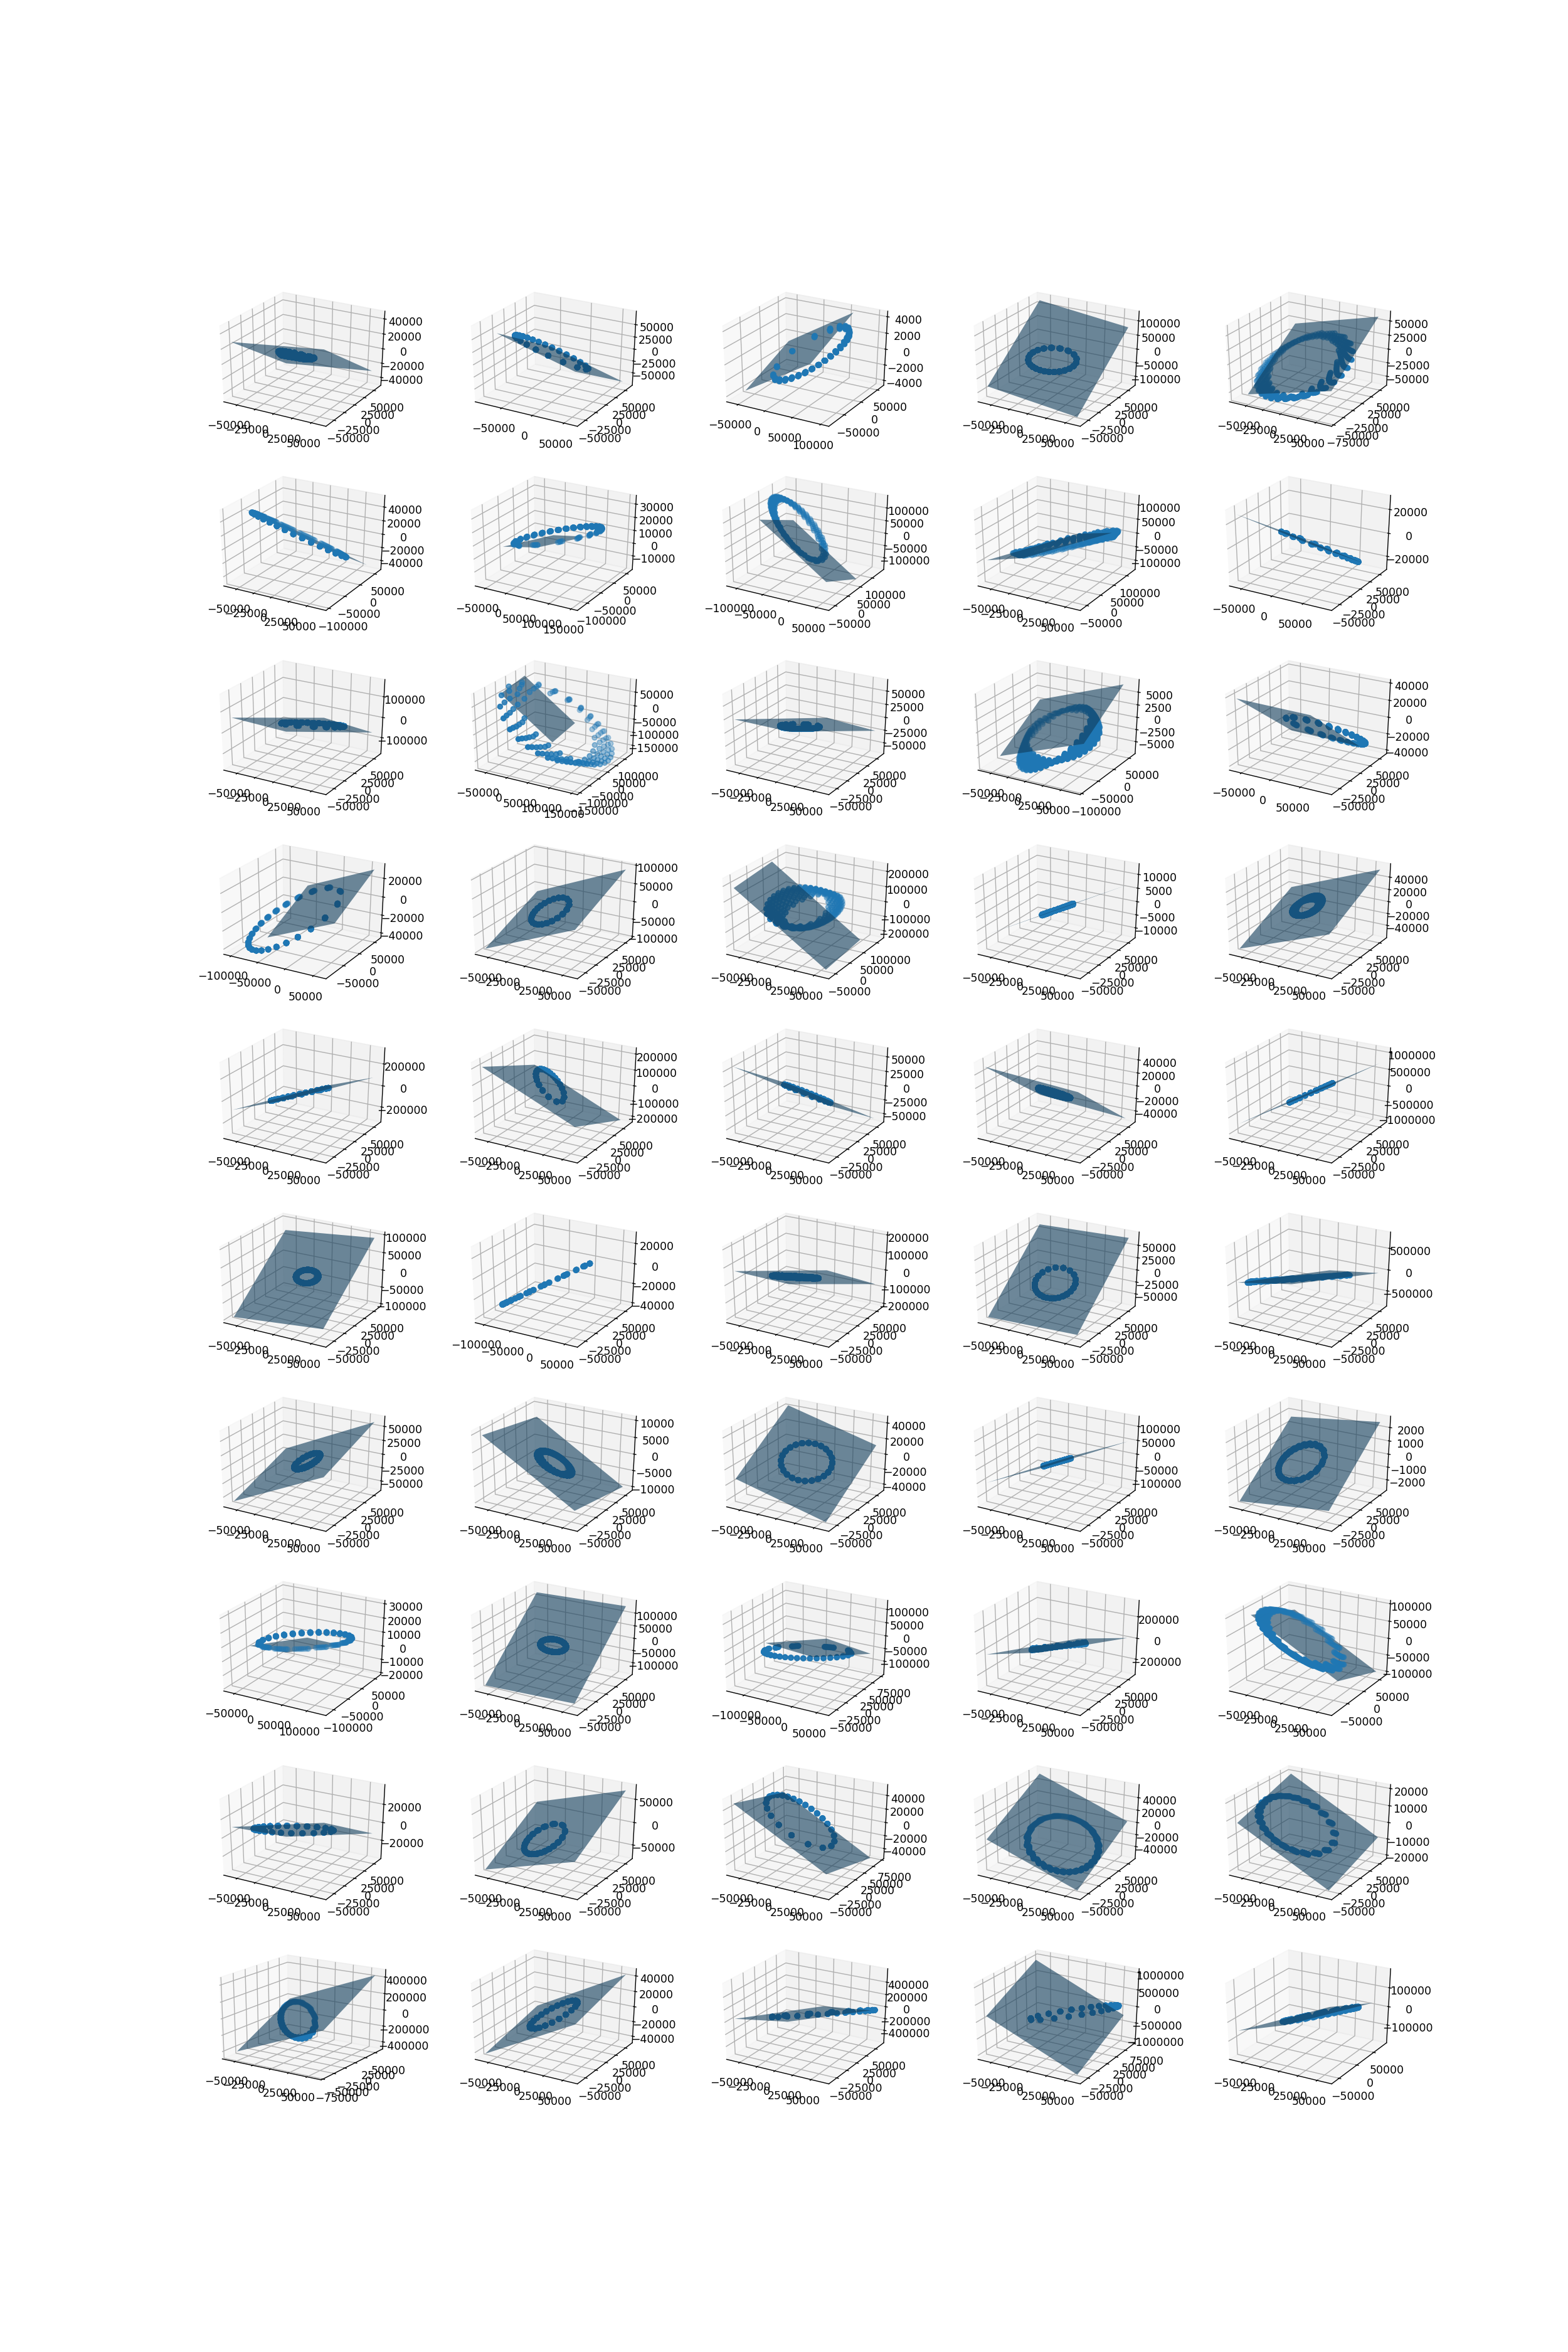

In [15]:
# %matplotlib notebook
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in full_test.sat_id.unique()[:]:
    ax = fig.add_subplot(10, 5, i, projection='3d')
    
    xx, yy = np.meshgrid([-60000, 60000], [-60000, 60000], sparse=True)
    A = train_coefs[train_coefs.sat_id == sat_id]['A'].values
    B = train_coefs[train_coefs.sat_id == sat_id]['B'].values
    C = train_coefs[train_coefs.sat_id == sat_id]['C'].values
    D = train_coefs[train_coefs.sat_id == sat_id]['D'].values
    zz = (-A * xx - B * yy + D) / C
    ax.plot_surface(xx, yy, zz, alpha=0.6)
    
    
    ax.scatter(full_train[full_train.sat_id == sat_id].x, full_train[full_train.sat_id == sat_id].y, full_train[full_train.sat_id == sat_id].z)
    i += 1
    if i == 51:
        break

In [ ]:
"""def new_coord(df, train_coefs):
    df[['x1', 'y1', 'z1']] = 0
    train_coefs[['x1c, y1c']] = 0
    for sat_id in df.sat_id.values:
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values
        d = sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha)
        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],
            [0 C/d -B/d],
            [A / sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]  
        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T - \
                                      np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"""
                                                       
        

In [10]:
def new_coord(df, train_coefs):
    df['x1'] = 0.0; df['y1'] = 0.0
    for sat_id in df.sat_id.unique():
        # print(sat_id)
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id][['A', 'B', 'C', 'D']].values[0]
        d = np.sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha) без последней строки
        M = [[d/np.sqrt(A ** 2 + d ** 2), -B*A/d/ np.sqrt(A ** 2 + d ** 2), -C*A/d/ np.sqrt(A ** 2 + d ** 2)],
             [0, C/d, -B/d]]
        
        sz = df[df.sat_id == sat_id].shape[0]
        
        coord = np.dot(M, (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T \
                    - np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)]))).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
    return df

In [11]:
part_train = full_train.loc[full_train['sat_id'].isin(full_test.sat_id.unique())]
part_train_new = new_coord(part_train.copy(), train_coefs)
part_train_new.head()

1
2
3
4
6
9
16
20
22
24
25
26
27
28
29
32
34
35
36
37
38
39
40
41
42
44
45
49
51
52
53
54
57
59
63
64
68
70
75
82
84
86
89
90
91
92
93
96
98
100
101
102
105
106
109
110
112
113
114
117
118
120
121
123
124
125
126
127
128
130
132
133
135
138
142
143
144
145
149
151
152
153
155
156
158
159
160
162
164
165
166
169
170
172
173
177
178
183
186
187
188
191
193
194
195
197
203
205
206
207
208
209
210
211
213
219
220
222
223
225
227
228
229
230
233
236
239
240
241
242
243
244
245
247
248
251
252
253
254
261
263
264
265
268
270
275
277
278
281
284
288
292
293
294
298
299
301
304
306
309
310
312
314
316
319
324
326
332
333
342
343
344
347
348
349
356
357
358
359
362
363
372
373
375
377
380
382
384
385
387
389
390
391
392
393
395
396
399
400
407
409
411
412
415
416
417
418
419
422
423
424
426
428
435
436
437
438
440
443
446
448
449
450
452
454
455
456
457
460
462
464
465
466
467
468
470
471
473
474
475
476
477
479
480
481
482
483
486
488
489
491
495
498
499
502
504
505
506
508
509
510
511
514
515

epoch  sat_id             x             y  \
id                                                                  
1819  2014-01-01T00:00:00.000       1  10390.313089  -2796.458271   
1820  2014-01-01T00:21:11.845       1  11195.606833   5078.653968   
1821  2014-01-01T00:42:23.690       1   8235.556436  11445.904263   
1822  2014-01-01T01:03:35.534       1   3560.149776  15634.195146   
1823  2014-01-01T01:24:47.379       1  -1580.476891  18023.318335   

                z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                            
1819  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
1820  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
1821 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
1822 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
1823 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

            z_sim    Vx_sim    Vy_sim    Vz_sim            x1            y1  
id                                                                           
1819  3166.926302  2.508879  6.152996 -2.826227  10418.093713   3774.438762  
1820  -845.930363 -1.130992  5.822303 -3.250049  11290.645646  -5041.655735  
1821 -4680.291877 -3.227356  4.123931 -2.700255   8351.463045 -12477.881711  
1822 -7650.341207 -3.960215  2.520907 -1.976723   3664.523173 -17601.820760  
1823 -9750.982621 -4.047005  1.297625 -1.347010  -1505.560037 -20735.316603

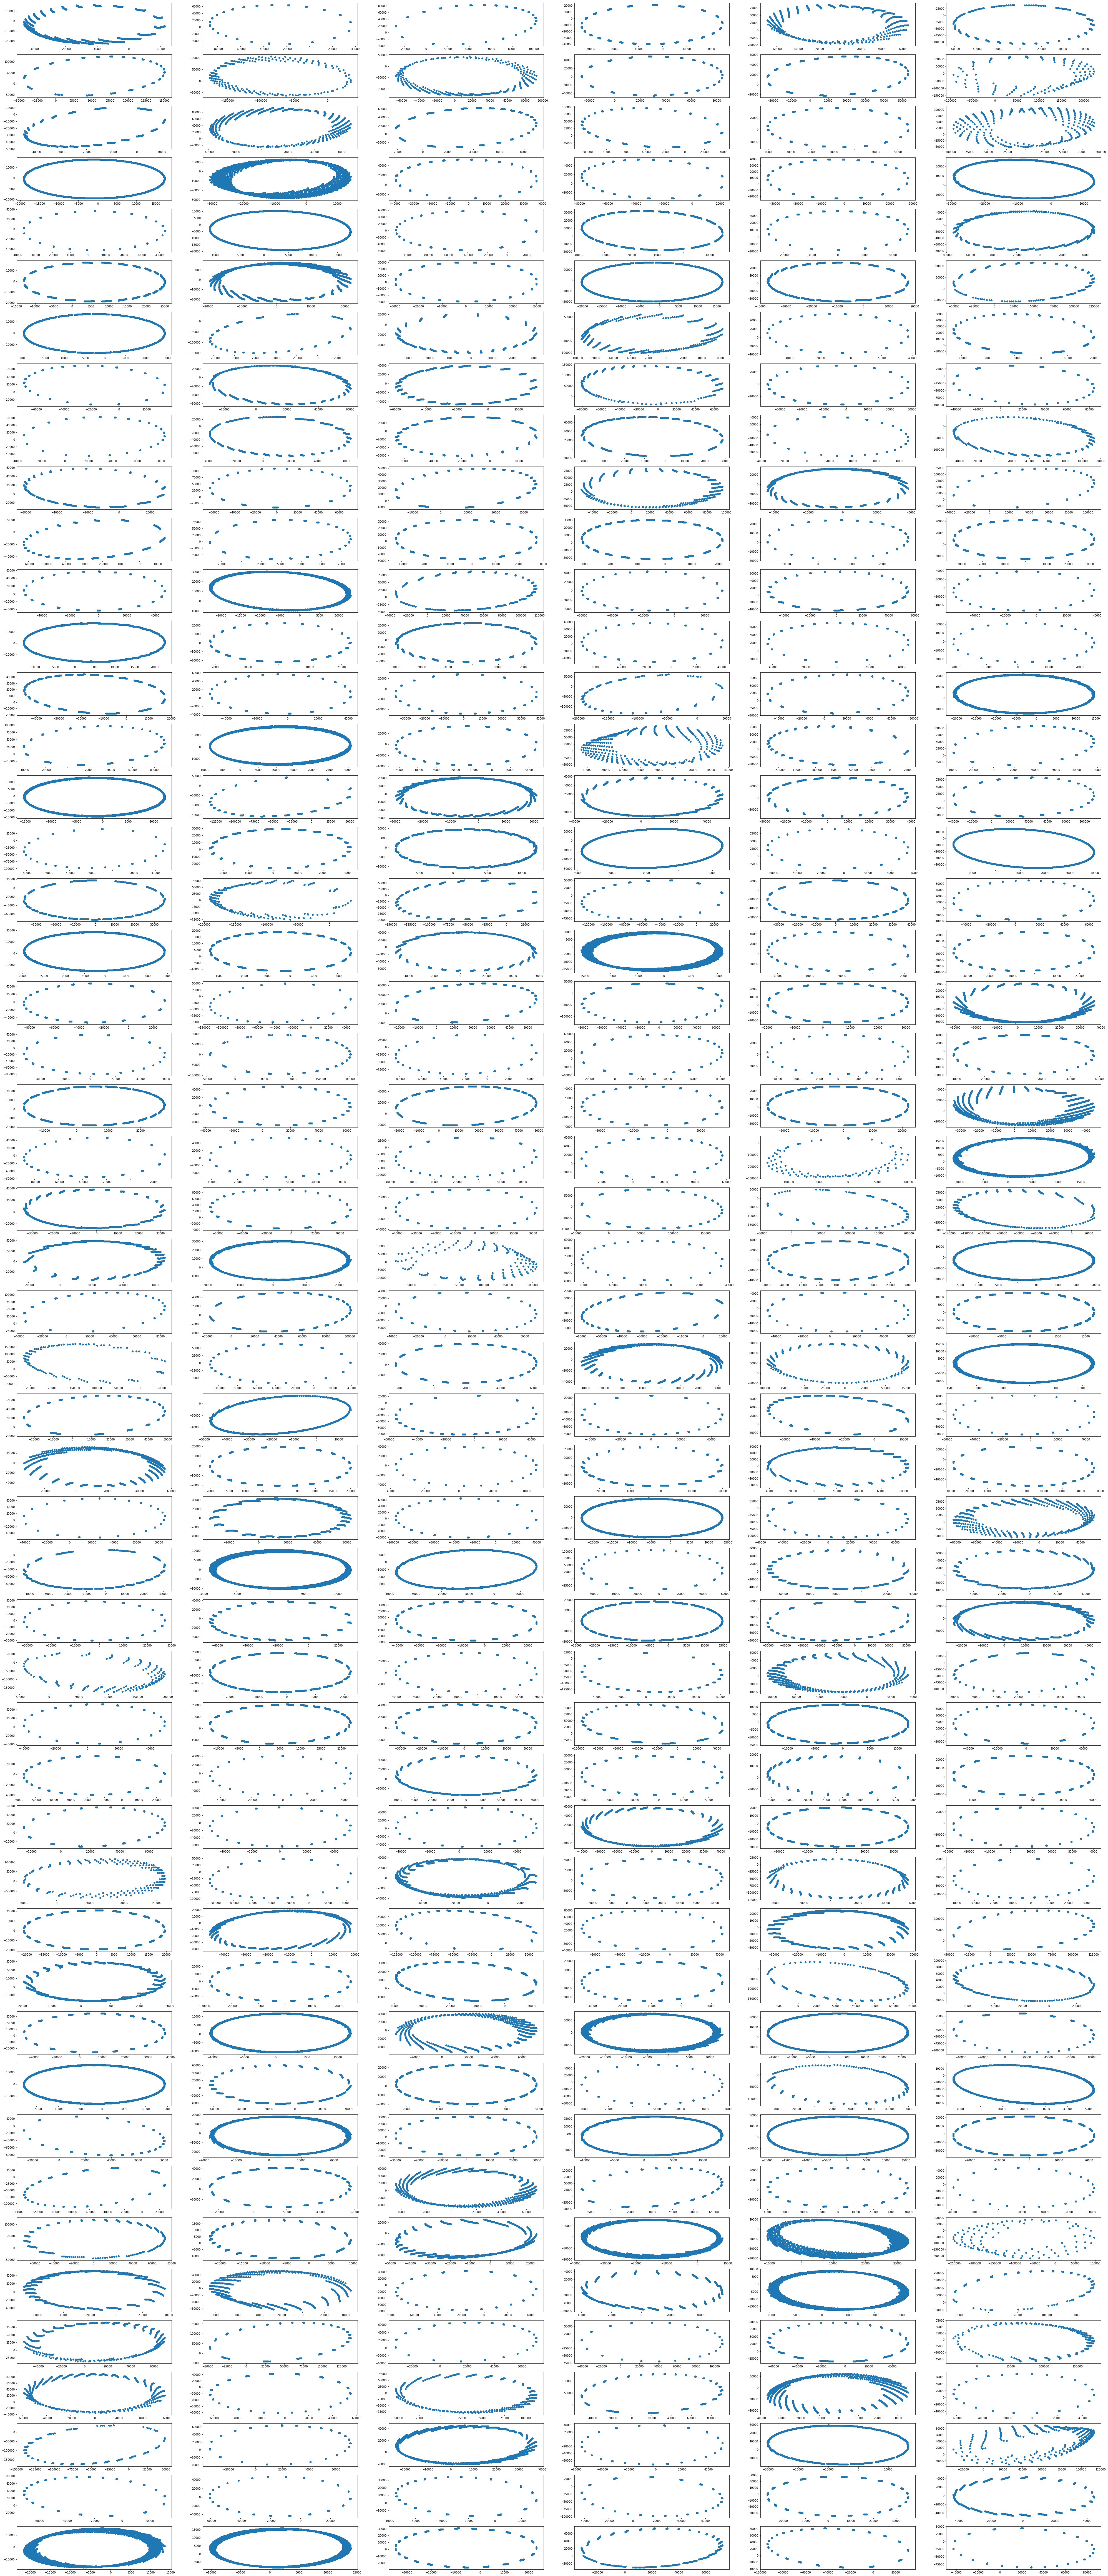

In [146]:
fig = plt.figure(figsize=(70, 170))

i = 1
for sat_id in part_train_new.sat_id.unique()[:]:
    ax = fig.add_subplot(50, 6, i)
    ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x1, part_train_new[part_train_new.sat_id == sat_id].y1)
    i += 1

In [43]:
def shift_to_center_and_rotate(df, train_coefs):
    train_coefs['xc'] = 0.0; train_coefs['yc'] = 0.0
    #shift
    for sat_id in df.sat_id.unique():
        train_coefs.loc[train_coefs.sat_id == sat_id, 'xc'] = (df[df.sat_id == sat_id].x1.max() + df[df.sat_id == sat_id].x1.min()) / 2
        train_coefs.loc[train_coefs.sat_id == sat_id, 'yc'] = (df[df.sat_id == sat_id].y1.max() + df[df.sat_id == sat_id].y1.min()) / 2
    
        df.loc[df.sat_id == sat_id, 'x1'] = df[df.sat_id == sat_id].x1.values - train_coefs[train_coefs.sat_id == sat_id].xc.values
        df.loc[df.sat_id == sat_id, 'y1'] = df[df.sat_id == sat_id].y1.values - train_coefs[train_coefs.sat_id == sat_id].yc.values
    
    train_coefs['small_polyos'] = 0.0; train_coefs['big_polyos'] = 0.0
    #rotate
    train_coefs['vect_max_x'] = 0.0; train_coefs['vect_max_y'] = 0.0
    train_coefs['vect_min_x'] = 0.0; train_coefs['vect_min_y'] = 0.0
    for sat_id in df.sat_id.unique():
        #print(sat_id)
        distances = np.sqrt((df[df.sat_id == sat_id].x1.values) ** 2 + (df[df.sat_id == sat_id].y1.values) ** 2)
        id_min = np.argmin(distances); id_max = np.argmax(distances)
        train_coefs.loc[train_coefs.sat_id == sat_id, 'small_polyos'] = distances[id_min]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'big_polyos'] = distances[id_max]
 
        a = df.loc[df[df.sat_id == sat_id].index[0] + id_max][['x1', 'y1']].values #vector where big polyos
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = a[0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = a[1]
        
        a1 = df.loc[df[df.sat_id == sat_id].index[0] + id_min][['x1', 'y1']].values #vector where big polyos
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = a1[0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = a1[1]
        
        cos_teta =  a[0] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        sin_teta = np.sqrt(1 - cos_teta ** 2)
        sin_teta = a[1] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        M = [[cos_teta, -sin_teta],
            [sin_teta, cos_teta]]
        coord = (np.dot(M, df[df.sat_id == sat_id][['x1', 'y1']].values.T)).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
        
        coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_max_x', 'vect_max_y']].values.T)).T
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = coord[:, 0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = coord[:, 1]
        
        coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_min_x', 'vect_min_y']].values.T)).T
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = coord[:, 0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = coord[:, 1]
    return df, train_coefs

In [44]:
part_train_new2, train_coefs_new = shift_to_center_and_rotate(part_train_new.copy(), train_coefs.copy())
part_train_new2.head()

epoch  sat_id             x             y  \
id                                                                  
1819  2014-01-01T00:00:00.000       1  10390.313089  -2796.458271   
1820  2014-01-01T00:21:11.845       1  11195.606833   5078.653968   
1821  2014-01-01T00:42:23.690       1   8235.556436  11445.904263   
1822  2014-01-01T01:03:35.534       1   3560.149776  15634.195146   
1823  2014-01-01T01:24:47.379       1  -1580.476891  18023.318335   

                z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                            
1819  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
1820  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
1821 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
1822 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
1823 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

            z_sim    Vx_sim    Vy_sim    Vz_sim            x1            y1  
id                                                                           
1819  3166.926302  2.508879  6.152996 -2.826227  18028.262935  13403.335064  
1820  -845.930363 -1.130992  5.822303 -3.250049  21626.951208   5308.008526  
1821 -4680.291877 -3.227356  4.123931 -2.700255  21173.384366  -2675.131724  
1822 -7650.341207 -3.960215  2.520907 -1.976723  18333.989019  -9012.322806  
1823 -9750.982621 -4.047005  1.297625 -1.347010  14410.454825 -13611.717985

In [45]:
train_coefs_new.head()

A         B         C           D  sat_id            xc  \
0  0.105813 -0.506322 -0.830986  428.095768       1 -10908.757244   
1  0.272114  0.582492  0.765522    0.417844       2 -25476.842324   
2  0.043096  0.024531 -0.998760  -11.926576       3  37123.834047   
3  0.153223 -0.843987  0.513590   10.014767       4  -4360.622629   
4  0.274336  0.515361 -0.811837   -5.018759       6  -1880.164977   

             yc  small_polyos    big_polyos    vect_max_x    vect_max_y  \
0  -3284.816408  14922.589858  22464.809264  18028.262935  13403.335064   
1   7663.915917  56337.730054  62644.100940  51943.534125 -35016.462488   
2  23930.676956  53710.956406  70237.976563  28261.717287  64301.233952   
3  -9257.666886  28799.283760  30617.204910 -20322.634501  22899.863831   
4  19403.562107  46529.262061  71514.487824  -8185.235701 -71044.520445   

     vect_min_x    vect_min_y  
0   5993.612589 -13666.027082  
1 -38799.238223 -40847.998004  
2  45818.075027 -28028.036658  
3 -23295.854290 -16932.274448  
4 -36817.761617  28450.389408

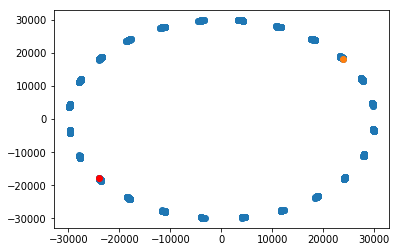

In [33]:
    fig = plt.figure()
    sat_id = 57
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')

In [34]:
train_coefs_new[train_coefs_new.sat_id == 57]

A         B         C         D  sat_id         xc          yc  \
32  0.218106 -0.407193  0.886862 -2.592735      57  97.574777  333.570707   

    small_polyos    big_polyos    vect_max_x    vect_max_y    vect_min_x  \
32  29974.180786  30113.582344  23907.614273  18309.937776 -24027.733354   

      vect_min_y  
32 -17919.808696

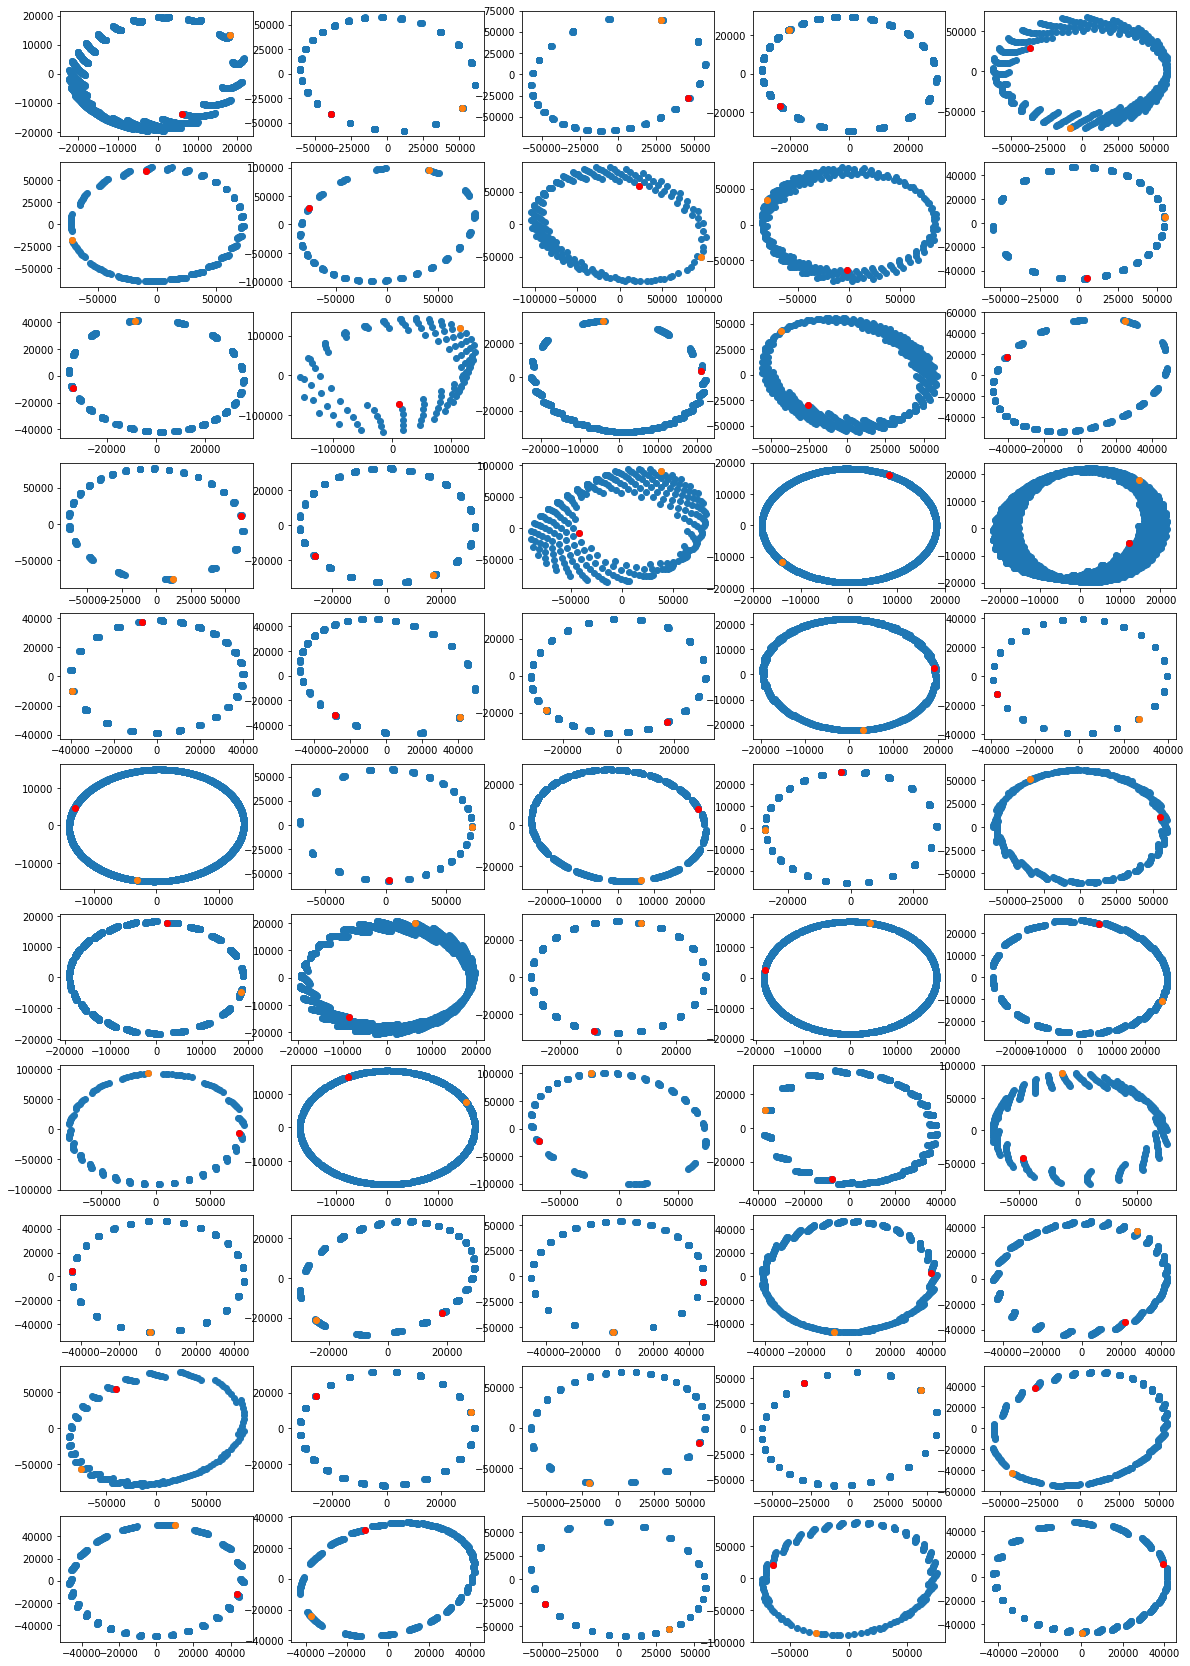

In [46]:
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in part_train_new2.sat_id.unique()[:]:
    ax = fig.add_subplot(11, 5, i)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')
    i += 1
    if i == 56:
        break